In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
import numpy.random as rnd

In [3]:
import tensorflow.keras as keras
import tensorflow.keras.layers as kl

# Data

### Load and explore

In [4]:
data_path = r"M:\Honza\ml test data\simplePoisson.csv"
df = pd.read_csv(data_path)
df.head()

,id,time,home,away,result
0,0,0.000000,0,0,1
1,0,0.642183,0,1,1
2,0,0.788225,0,2,1
3,0,1.607837,0,3,1
4,0,2.237313,1,3,1


In [5]:
df = df[(df.home != 10) & (df.away != 10)]

In [6]:
set(df.home), set(df.away)

({0, 1, 2, 3, 4, 5, 6, 7, 8, 9}, {0, 1, 2, 3, 4, 5, 6, 7, 8, 9})

In [7]:
len(df), len(set(df.id))

(1646852, 100000)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EFD6D170B8>,
      dtype=object)

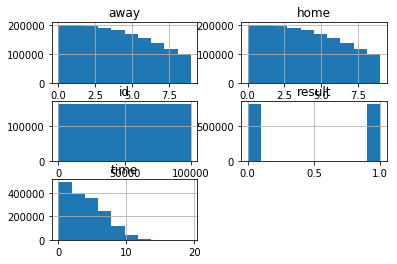

In [8]:
df.hist()

### Prepare data for training

In [9]:
matches = set(df.id)
train_matches = set(rnd.choice(
    a = np.array(list(matches)), 
    size= int(0.7 * len(matches)),  
    replace=False
))
train_mask = df.id.isin(train_matches)

In [10]:
x = df[["time", "home", "away"]]
y = df[["result"]]

In [11]:
train_x, train_y = x[train_mask], y[train_mask]
valid_x, valid_y = x[~train_mask], y[~train_mask]

# Model

In [79]:
model = keras.Sequential([
    kl.Input([3]),
    kl.Dense(4, "relu", kernel_regularizer=keras.regularizers.l2(0.001)),
    kl.Dense(32, "relu", kernel_regularizer=keras.regularizers.l2(0.001)),
    kl.Dense(64, "relu", kernel_regularizer=keras.regularizers.l2(0.001)),
    kl.Dense(32, "relu", kernel_regularizer=keras.regularizers.l2(0.001)),
    kl.Dense(4, "relu", kernel_regularizer=keras.regularizers.l2(0.001)),
    kl.Dense(1, "sigmoid", kernel_regularizer=keras.regularizers.l2(0.001)),
])

In [98]:
reg = None
model = keras.Sequential([
    kl.Input([3]),
    kl.Dense(4, "relu", kernel_regularizer=reg),
    kl.Dense(32, "relu", kernel_regularizer=reg),
    kl.Dense(64, "relu", kernel_regularizer=reg),
    kl.Dense(32, "relu", kernel_regularizer=reg),
    kl.Dense(4, "relu", kernel_regularizer=reg),
    kl.Dense(1, "sigmoid", kernel_regularizer=reg),
])

In [99]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 4)                 16        
_________________________________________________________________
dense_16 (Dense)             (None, 32)                160       
_________________________________________________________________
dense_17 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_18 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_19 (Dense)             (None, 4)                 132       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 5         
Total params: 4,505
Trainable params: 4,505
Non-trainable params: 0
____________________________________________________

In [100]:
# model = keras.Sequential([
#     kl.Input([3]),
#     kl.Dense(1, "sigmoid", kernel_regularizer=keras.regularizers.l2(0.001)),
# ])

In [101]:
model.compile("adam", "binary_crossentropy")

In [102]:
model.fit(x=train_x, y=train_y, validation_data=(valid_x, valid_y), 
          batch_size=4*1024,
         epochs=10, )

Train on 1152585 samples, validate on 494267 samples
Epoch 1/10
1152585/1152585 [==============================] - 2s 2us/sample - loss: 0.5629 - val_loss: 0.5531
Epoch 2/10
1152585/1152585 [==============================] - 2s 2us/sample - loss: 0.5538 - val_loss: 0.5537
Epoch 3/10
1152585/1152585 [==============================] - 2s 2us/sample - loss: 0.5532 - val_loss: 0.5518
Epoch 4/10
1152585/1152585 [==============================] - 2s 2us/sample - loss: 0.5528 - val_loss: 0.5516
Epoch 5/10
1152585/1152585 [==============================] - 2s 2us/sample - loss: 0.5527 - val_loss: 0.5529
Epoch 6/10
1152585/1152585 [==============================] - 2s 2us/sample - loss: 0.5526 - val_loss: 0.5519
Epoch 7/10
1152585/1152585 [==============================] - 2s 2us/sample - loss: 0.5525 - val_loss: 0.5514
Epoch 8/10
1152585/1152585 [==============================] - 2s 2us/sample - loss: 0.5524 - val_loss: 0.5515
Epoch 9/10
1152585/1152585 [==============================] - 2s 2u

# Enjoy trained Model

In [103]:
TT, XX, YY = np.mgrid[0:20:50j, 0:11, 0:11]

In [104]:
UUU = np.stack([TT.flatten(), XX.flatten(), YY.flatten()], axis=-1)
ZZ = model.predict(UUU).reshape(XX.shape)

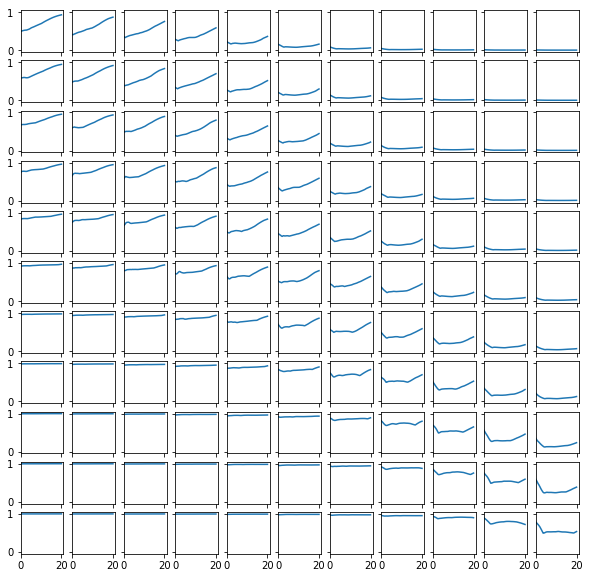

In [105]:
fig, axs = plt.subplots(11, 11, figsize = [10, 10], sharex=True, sharey=True)
for i in range(11):
    for j in range(11):
        ax = axs[i, j]
        ax.plot(TT[:, 0, 0], ZZ[:, i, j])
        ax.set_xlim(0, )

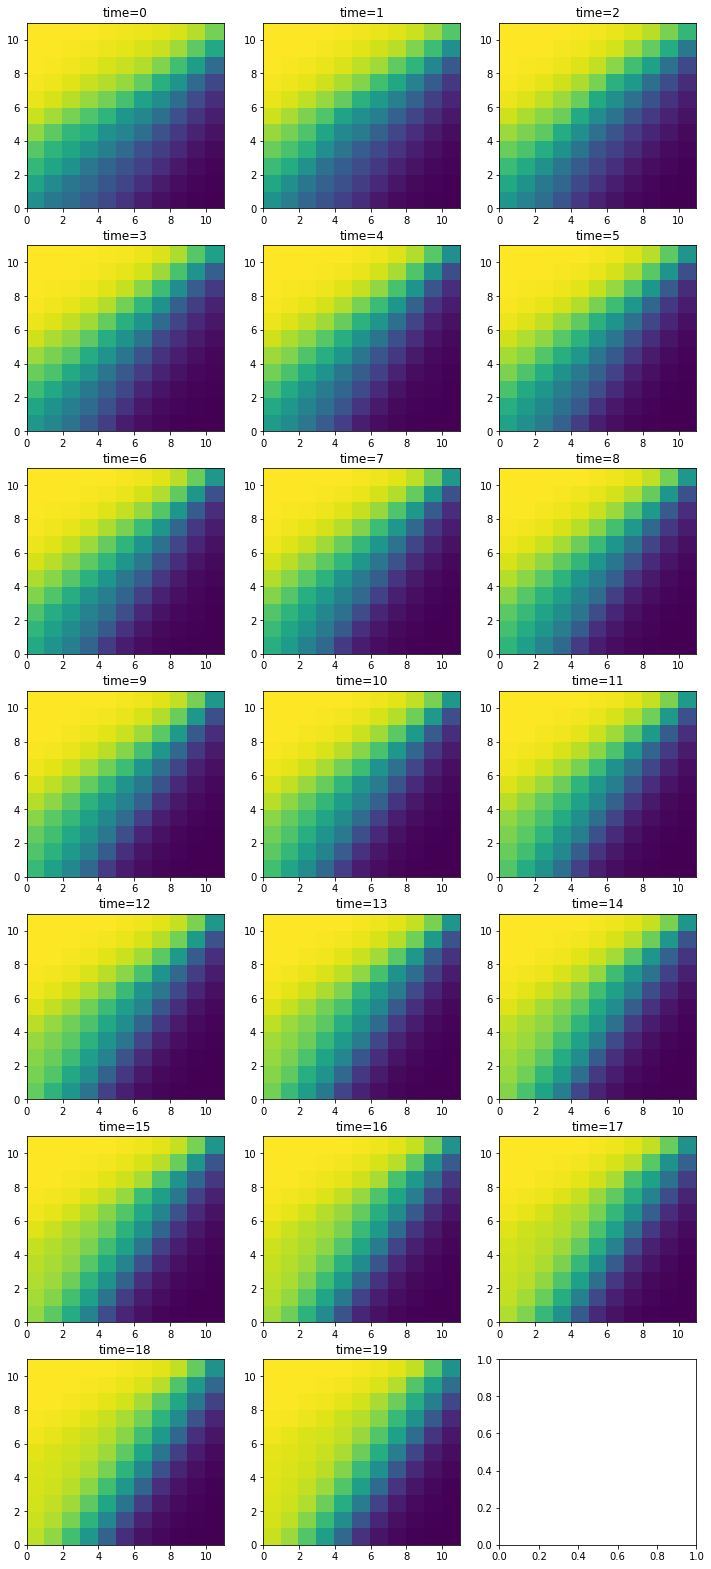

In [106]:
def plot_for_one_t(t, ax=None):
    ax = ax or plt.gca()
    ZZ = model.predict(np.array([[t, x, y] for x in xxx for y in xxx]))
    ZZ = ZZ.reshape([11, 11])
    ax.pcolor(ZZ)
    
times = np.arange(20)
n_cols = 3
ax_size = [4, 4]

n_rows = int(np.ceil(len(times) / n_cols))
figsize = np.array([n_cols, n_rows]) * ax_size
fig, axs = plt.subplots(n_rows, n_cols, figsize=figsize)
for t, ax in zip(times, axs.flat):
    ax.set_title(f"time={t}")
    plot_for_one_t(t, ax)
    

### Comparison with exact model

In [107]:
df["model"] = model.predict(df[["time", "home", "away"]])

In [108]:
df.head()

,id,time,home,away,result,model
0,0,0.000000,0,0,1,0.497428
1,0,0.642183,0,1,1,0.412256
2,0,0.788225,0,2,1,0.330966
3,0,1.607837,0,3,1,0.246314
4,0,2.237313,1,3,1,0.331495


In [109]:
model_probas = df.pivot_table("model", "home", "away").values
model_probas.round(2)

array([[0.5 , 0.41, 0.34, 0.26, 0.18, 0.1 , 0.04, 0.02, 0.01, 0.  ],
       [0.59, 0.5 , 0.4 , 0.33, 0.24, 0.15, 0.07, 0.03, 0.01, 0.01],
       [0.68, 0.61, 0.5 , 0.4 , 0.31, 0.22, 0.12, 0.05, 0.02, 0.01],
       [0.77, 0.72, 0.62, 0.51, 0.39, 0.29, 0.19, 0.09, 0.04, 0.02],
       [0.85, 0.8 , 0.74, 0.62, 0.52, 0.4 , 0.28, 0.16, 0.07, 0.03],
       [0.93, 0.88, 0.83, 0.75, 0.63, 0.52, 0.39, 0.25, 0.13, 0.06],
       [0.97, 0.95, 0.91, 0.85, 0.76, 0.65, 0.52, 0.37, 0.21, 0.1 ],
       [0.99, 0.98, 0.96, 0.93, 0.88, 0.8 , 0.69, 0.53, 0.33, 0.16],
       [0.99, 0.99, 0.98, 0.97, 0.95, 0.91, 0.85, 0.73, 0.53, 0.29],
       [1.  , 1.  , 0.99, 0.99, 0.98, 0.96, 0.94, 0.88, 0.77, 0.53]],
      dtype=float32)

In [110]:
import numpy as np
from scipy.special import binom

def fun(mu, lamb, x, y):
    n = np.arange(y)
    return (mu / (lamb + mu))**x * np.sum(binom(n + x - 1, n) * (lamb / (lamb + mu))**n ) 

def ppst( domaci, hoste):
    if domaci == 10:
        return 1
    return fun(1, 1, 10 - domaci, 10 - hoste)

In [111]:
exact_probas = np.array(
    [
        [ppst(i, j) for j in range(10)] 
        for i in range(10)
    ]
)

In [112]:
np.round(exact_probas, 2)

array([[0.5 , 0.41, 0.31, 0.23, 0.15, 0.09, 0.05, 0.02, 0.01, 0.  ],
       [0.59, 0.5 , 0.4 , 0.3 , 0.21, 0.13, 0.07, 0.03, 0.01, 0.  ],
       [0.69, 0.6 , 0.5 , 0.4 , 0.29, 0.19, 0.11, 0.05, 0.02, 0.  ],
       [0.77, 0.7 , 0.6 , 0.5 , 0.39, 0.27, 0.17, 0.09, 0.04, 0.01],
       [0.85, 0.79, 0.71, 0.61, 0.5 , 0.38, 0.25, 0.14, 0.06, 0.02],
       [0.91, 0.87, 0.81, 0.73, 0.62, 0.5 , 0.36, 0.23, 0.11, 0.03],
       [0.95, 0.93, 0.89, 0.83, 0.75, 0.64, 0.5 , 0.34, 0.19, 0.06],
       [0.98, 0.97, 0.95, 0.91, 0.86, 0.77, 0.66, 0.5 , 0.31, 0.12],
       [0.99, 0.99, 0.98, 0.96, 0.94, 0.89, 0.81, 0.69, 0.5 , 0.25],
       [1.  , 1.  , 1.  , 0.99, 0.98, 0.97, 0.94, 0.88, 0.75, 0.5 ]])

In [113]:
(model_probas - exact_probas).max()

0.044075846672058105

In [114]:
print((model_probas - exact_probas).round(2))

[[-0.    0.    0.03  0.04  0.03  0.01 -0.   -0.    0.    0.  ]
 [-0.   -0.   -0.    0.02  0.03  0.02 -0.   -0.    0.    0.  ]
 [-0.    0.01  0.    0.    0.02  0.03  0.01 -0.    0.    0.01]
 [-0.    0.02  0.01  0.01  0.01  0.02  0.02  0.    0.01  0.01]
 [-0.    0.01  0.03  0.01  0.02  0.02  0.02  0.01  0.01  0.02]
 [ 0.02  0.01  0.02  0.02  0.01  0.02  0.03  0.02  0.02  0.02]
 [ 0.02  0.02  0.02  0.02  0.02  0.01  0.02  0.03  0.02  0.04]
 [ 0.01  0.01  0.02  0.02  0.03  0.03  0.03  0.03  0.02  0.04]
 [-0.    0.    0.    0.01  0.01  0.02  0.03  0.04  0.03  0.04]
 [-0.   -0.   -0.   -0.   -0.   -0.   -0.    0.01  0.02  0.03]]


In [97]:
obs_probas = df.pivot_table("result", "home", "away", ).values
np.round(obs_probas, 2)

array([[0.5 , 0.41, 0.31, 0.23, 0.15, 0.09, 0.06, 0.02, 0.01, 0.  ],
       [0.59, 0.5 , 0.4 , 0.3 , 0.21, 0.13, 0.07, 0.03, 0.01, 0.  ],
       [0.69, 0.6 , 0.5 , 0.39, 0.29, 0.19, 0.12, 0.06, 0.02, 0.  ],
       [0.78, 0.7 , 0.61, 0.5 , 0.39, 0.27, 0.17, 0.09, 0.03, 0.01],
       [0.85, 0.79, 0.71, 0.61, 0.5 , 0.38, 0.25, 0.15, 0.06, 0.02],
       [0.91, 0.87, 0.81, 0.72, 0.62, 0.5 , 0.36, 0.23, 0.11, 0.03],
       [0.95, 0.93, 0.89, 0.83, 0.75, 0.63, 0.49, 0.34, 0.19, 0.06],
       [0.98, 0.97, 0.95, 0.91, 0.86, 0.78, 0.66, 0.5 , 0.31, 0.13],
       [0.99, 0.99, 0.98, 0.97, 0.94, 0.89, 0.81, 0.69, 0.5 , 0.25],
       [1.  , 1.  , 1.  , 0.99, 0.99, 0.97, 0.94, 0.87, 0.75, 0.5 ]])

In [33]:
(model_probas - obs_probas).max()

0.12916826769193482

In [131]:
(exact_probas - obs_probas)[:-1, :-1].max()

0.006223516949152519

In [ ]:
model_probas 

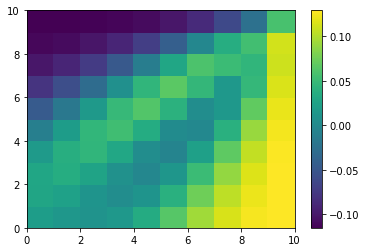

In [30]:
im = plt.pcolor(model_probas - exact_probas)
plt.colorbar(im)

In [136]:
print((model_probas - exact_probas).round(2))

[[ 0.04  0.05  0.04  0.02  0.02  0.04  0.07  0.09  0.1   0.1   0.1 ]
 [ 0.03  0.04  0.04  0.02  0.01  0.02  0.05  0.08  0.09  0.1   0.1 ]
 [ 0.04  0.05  0.04  0.03  0.    0.    0.03  0.06  0.09  0.1   0.1 ]
 [ 0.04  0.06  0.06  0.05  0.02 -0.01  0.    0.04  0.08  0.1   0.1 ]
 [ 0.01  0.04  0.06  0.07  0.05  0.01 -0.01  0.02  0.06  0.1   0.11]
 [-0.02  0.    0.04  0.07  0.08  0.05  0.   -0.01  0.04  0.09  0.11]
 [-0.06 -0.04 -0.01  0.03  0.06  0.08  0.05  0.    0.02  0.08  0.12]
 [-0.08 -0.07 -0.05 -0.03  0.01  0.05  0.07  0.05  0.02  0.07  0.14]
 [-0.09 -0.09 -0.08 -0.07 -0.05 -0.02  0.02  0.05  0.05  0.07  0.19]
 [-0.1  -0.1  -0.1  -0.09 -0.09 -0.08 -0.06 -0.04 -0.01  0.04  0.31]
 [-0.1  -0.1  -0.1  -0.1  -0.1  -0.1  -0.11 -0.13 -0.16 -0.26 -0.47]]


In [141]:
df.pivot_table("result", "home", "away", aggfunc="count")

away,0,1,2,3,4,5,6,7,8,9,10
home,,,,,,,,,,,
0,100000.0,49991.0,24882.0,12450.0,6105.0,3050.0,1517.0,762.0,389.0,202.0,97.0
1,50009.0,50126.0,37291.0,24968.0,15603.0,9445.0,5524.0,3043.0,1722.0,934.0,441.0
2,24992.0,37786.0,37635.0,31287.0,23309.0,16300.0,11061.0,6951.0,4379.0,2714.0,1394.0
3,12473.0,25014.0,31259.0,31390.0,27357.0,21704.0,16424.0,11748.0,8027.0,5315.0,2651.0
4,6278.0,15676.0,23413.0,27353.0,27422.0,24706.0,20438.0,16101.0,12075.0,8748.0,4408.0
5,3125.0,9393.0,16479.0,21781.0,24628.0,24728.0,22615.0,19275.0,15723.0,12165.0,6086.0
6,1533.0,5460.0,11059.0,16273.0,20475.0,22605.0,22656.0,20891.0,18457.0,15323.0,7875.0
7,765.0,3167.0,7131.0,11666.0,15965.0,19256.0,20867.0,20858.0,19626.0,17379.0,8699.0
8,374.0,1775.0,4492.0,8119.0,12063.0,15720.0,18267.0,19536.0,19459.0,18304.0,9131.0
